In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import scipy
from scipy.optimize import curve_fit
import seaborn as sns
from matplotlib import cm
import csv
import scipy.io as sio
import pandas as pd
from scipy.special import erf
import time
import os
import torch

# plotting configuration
ratio = 1.7
figure_len, figure_width = 24*ratio, 18*ratio
title_font_size = 12*ratio
font_size_1, font_size_2 = 9*ratio, 9*ratio
legend_size = 18*ratio
line_width, tick_len = ratio, 4*ratio
marker_size = 5*ratio
plot_line_width = 2*ratio
hfont = {'fontname': 'Arial'}
marker_edge_width = 4
pal = sns.color_palette("deep")
sns.set(style='ticks')

### Fig. S16 - normalized excitatory activity when silencing specific inhibitory populations

_PV_silencing_over_time
_SST_silencing_over_time
_VIP_silencing_over_time


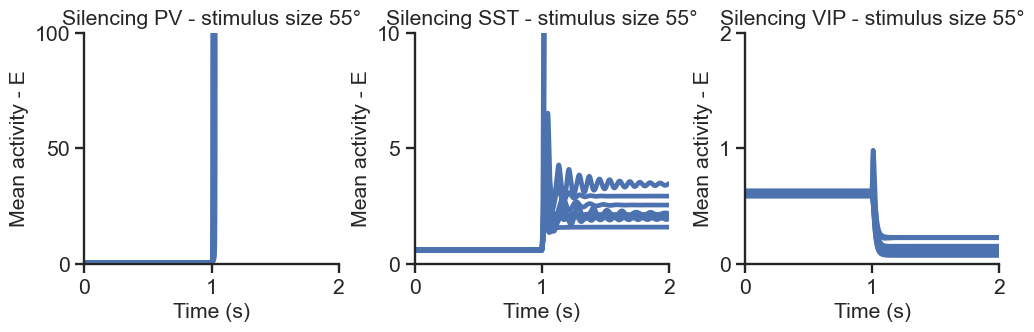

In [5]:
n_stim_type = 1
l_stim_type_index = [0] # 0 for classical only
l_config = ['final_gaussian_classical']
l_silencing_config = ['_PV_silencing_over_time', '_SST_silencing_over_time', '_VIP_silencing_over_time']
l_title = [s.replace('_', ' ') for s in l_config]
l_baseline = sio.loadmat("data/baselines.mat")['baseline']
t_start = 2000
    
for config_idx in range(len(l_config)):
    config = l_config[config_idx]
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    fig.tight_layout()
    
    for silencing_idx in range(len(l_silencing_config)):
        idx = silencing_idx
        silencing_config = l_silencing_config[silencing_idx]
        print(silencing_config)
        
        folder_path = 'models/optimized_files_' + config + '/'
        model_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f != '.DS_Store']
        sorted_files = sorted(model_names, key=lambda name: float(name.replace('.pt', '')))
        sorted_numbers = sorted([float(f.replace('.pt', '')) for f in sorted_files])

        if len(sorted_files) > 10:
            n_selected_models = 10
        else:
            n_selected_models = len(sorted_files)

        bias_mat = sio.loadmat('data/bias_mat_' + config + '.mat')['bias_mat']

        for model_name_idx in range(n_selected_models):
            model_name = sorted_files[model_name_idx]

            fr_E_mat = sio.loadmat('simulation_data/fr_E_' + config + silencing_config + '_' + model_name + '.mat')['E']

            axes[idx].spines['top'].set_visible(False)
            axes[idx].spines['right'].set_visible(False)
            axes[idx].spines['bottom'].set_visible(True)
            axes[idx].spines['left'].set_visible(True)
            for axis in ['top', 'bottom', 'left', 'right']:
                axes[idx].spines[axis].set_linewidth(line_width)
            axes[idx].tick_params(width=line_width, length=tick_len)

            axes[idx].plot(np.mean(fr_E_mat, axis=0), linewidth=plot_line_width, color=pal[0])

            axes[idx].set_xlim(0, 2000)
            axes[idx].set_xticks([0, 1000, 2000], [0, 1, 2])

            axes[idx].tick_params(axis='both', which='major', labelsize=font_size_1)  # Customize tick label font size

            axes[idx].set_xlabel('Time (s)', fontdict={'fontname': 'Arial', 'fontsize': font_size_1})
            axes[idx].set_ylabel('Mean activity - E', fontdict={'fontname': 'Arial', 'fontsize': font_size_1}) 

            if silencing_idx == 0:
                axes[idx].set_yticks([0, 50, 100])
                axes[idx].set_ylim(0, 100)
                axes[idx].set_title('Silencing PV - stimulus size 55°', fontdict = {'fontname': 'Arial', 'fontsize': font_size_1})
            elif silencing_idx == 1:
                axes[idx].set_yticks([0, 5, 10])
                axes[idx].set_ylim(0, 10)
                axes[idx].set_title('Silencing SST - stimulus size 55°', fontdict = {'fontname': 'Arial', 'fontsize': font_size_1})
            else:
                axes[idx].set_ylim(0, 2)
                axes[idx].set_yticks([0, 1, 2])
                axes[idx].set_title('Silencing VIP - stimulus size 55°', fontdict = {'fontname': 'Arial', 'fontsize': font_size_1})
            
            axes[idx].tick_params(axis='both', which='major', labelsize=font_size_1)  # Customize tick label font size
            for label in (axes[idx].get_xticklabels() + axes[idx].get_yticklabels()):
                label.set_fontname('Arial')

    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    # fig.savefig('paper_figures/paper_png/Fig_silencing_specific_inhibition.png', bbox_inches='tight', dpi=300)
    # fig.savefig('paper_figures/paper_pdf/Fig_silencing_specific_inhibition.pdf', bbox_inches='tight')